In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
# Logitech Tastatur: Schnell
file_path = ".\AUTO_Logitech_Gaming_Keyboard_G213_1ms_1.csv"
data_start_line = 15 
data_gk = pd.read_csv(file_path, sep=';', skiprows=data_start_line)
data_gk['latency'] = data_gk['latency'] / 1000 # für millisekunden
data_gk = data_gk["latency"]

data_gk.head()

0    2.978
1    2.986
2    2.362
3    2.273
4    2.266
Name: latency, dtype: float64

In [10]:
# Acer Tastatur: Langsam
file_path = ".\AUTO_6312kw_0ms_1.csv"
data_start_line = 7
data_acer = pd.read_csv(file_path, sep=';', skiprows=data_start_line)
data_acer['latency'] = data_acer['latency'] / 1000 # für millisekunden
data_acer = data_acer["latency"]

data_acer.head()

0    39.583
1    45.107
2    31.571
3    45.996
4    64.480
Name: latency, dtype: float64

In [12]:
# simon task daten einlesen
file_path = "simon_task.txt" 

simon_data = pd.read_csv(file_path, sep="\t", header=None, names=["trial", "side", "response", "condition", "block", "reaction_time"])
simon_data.head()

,trial,side,response,condition,block,reaction_time
0,3,right,rightresponse,compatible,1,602
1,2,right,leftresponse,incompatible,1,766
2,1,left,leftresponse,compatible,1,823
3,2,right,leftresponse,incompatible,1,597
4,3,right,rightresponse,compatible,1,783


In [26]:
# nach compatible(reiz ist auf der selben seite auf der die reaktion sein soll) und incompatible aufsplitten
compatible_simon_data = simon_data[simon_data['condition'] == 'compatible']
compatible_simon_data = compatible_simon_data["reaction_time"]
incompatible_simon_data = simon_data[simon_data['condition'] == 'incompatible']
incompatible_simon_data = incompatible_simon_data["reaction_time"]
compatible_simon_data.head()

0     602
2     823
4     783
5     694
6    1918
Name: reaction_time, dtype: int64

In [27]:
incompatible_simon_data.head()

1     766
3     597
7     874
9     465
10    869
Name: reaction_time, dtype: int64

In [16]:
# Parameter der Simulation
n_simulationen = 10000  # Anzahl der Monte-Carlo-Läufe

# fürn Bildschirm auch gleich in ms
refresh_cycle_min = 0  # Minimaler Zeitwert innerhalb eines Refresh-Cycles
refresh_cycle_max = 16.66  # Maximaler Zeitwert innerhalb eines Refresh-Cycles
constant_delay_min = 5  # Mindestverzögerung in ms
constant_delay_max = 12

In [20]:
refresh_cycle_delay = np.random.uniform(refresh_cycle_min, refresh_cycle_max, n_simulationen)
constant_delay = np.random.uniform(constant_delay_min, constant_delay_max, n_simulationen)
bildschirm_latenzen = refresh_cycle_delay + constant_delay
len(bildschirm_latenzen)

array([14.85655234, 18.77765356, 16.60794032, ..., 18.90673705,
       18.24500023, 20.62483596])

In [28]:
eingabe_latenzen_gk = np.random.choice(data_gk, size=n_simulationen, replace=True) # replace ist mit zurücklegen
eingabe_latenzen_acer = np.random.choice(data_acer, size=n_simulationen, replace=True)

reaction_time_compatible = np.random.choice(compatible_simon_data, size=n_simulationen, replace=True)
reaction_time_incompatible = np.random.choice(compatible_simon_data, size=n_simulationen, replace=True)

array([579, 502, 505, ..., 609, 579, 937], dtype=int64)

In [33]:
# gesamtverzögerung schnelle tastatur
gesamtverzögerung_compatible_gk = eingabe_latenzen_gk + reaction_time_compatible + bildschirm_latenzen
gesamtverzögerung_incompatible_gk = eingabe_latenzen_gk + reaction_time_incompatible + bildschirm_latenzen

In [34]:
# gesamtverzögerung langsame tastatur
gesamtverzögerung_compatible_acer = eingabe_latenzen_acer + reaction_time_compatible + bildschirm_latenzen
gesamtverzögerung_incompatible_acer = eingabe_latenzen_acer + reaction_time_incompatible + bildschirm_latenzen

In [35]:
# Gesamtverzögerungen schnelle Tastatur
gk_compatible_mean_final = np.mean(gesamtverzögerung_compatible_gk)
gk_compatible_std_final = np.std(gesamtverzögerung_compatible_gk)
gk_incompatible_mean_final = np.mean(gesamtverzögerung_incompatible_gk)
gk_incompatible_std_final = np.std(gesamtverzögerung_incompatible_gk)
print(f"Compatible - Mittelwert der Gesamtverzögerung Gaming Keyboard: {gk_compatible_mean_final:.2f} ms")
print(f"Compatible - Standardabweichung der Gesamtverzögerung Gaming Keyboard: {gk_compatible_std_final:.2f} ms")
print(f"Incompatible - Mittelwert der Gesamtverzögerung Gaming Keyboard: {gk_incompatible_mean_final:.2f} ms")
print(f"Incompatible - Standardabweichung der Gesamtverzögerung Gaming Keyboard: {gk_incompatible_std_final:.2f} ms")

Compatible - Mittelwert der Gesamtverzögerung Gaming Keyboard: 658.86 ms
Compatible - Standardabweichung der Gesamtverzögerung Gaming Keyboard: 222.68 ms
Incompatible - Mittelwert der Gesamtverzögerung Gaming Keyboard: 660.66 ms
Incompatible - Standardabweichung der Gesamtverzögerung Gaming Keyboard: 228.01 ms


In [36]:
# Gesamtverzögerungen langsame Tastatur
acer_compatible_mean_final = np.mean(gesamtverzögerung_compatible_acer)
acer_compatible_std_final = np.std(gesamtverzögerung_compatible_acer)
acer_incompatible_mean_final = np.mean(gesamtverzögerung_incompatible_acer)
acer_incompatible_std_final = np.std(gesamtverzögerung_incompatible_acer)
print(f"Compatible - Mittelwert der Gesamtverzögerung Acer Keyboard: {acer_compatible_mean_final:.2f} ms")
print(f"Compatible - Standardabweichung der Gesamtverzögerung Acer Keyboard: {acer_compatible_std_final:.2f} ms")
print(f"Incompatible - Mittelwert der Gesamtverzögerung Acer Keyboard: {acer_incompatible_mean_final:.2f} ms")
print(f"Incompatible - Standardabweichung der Gesamtverzögerung Acer Keyboard: {acer_incompatible_std_final:.2f} ms")

Compatible - Mittelwert der Gesamtverzögerung Acer Keyboard: 705.46 ms
Compatible - Standardabweichung der Gesamtverzögerung Acer Keyboard: 223.32 ms
Incompatible - Mittelwert der Gesamtverzögerung Acer Keyboard: 707.26 ms
Incompatible - Standardabweichung der Gesamtverzögerung Acer Keyboard: 228.40 ms


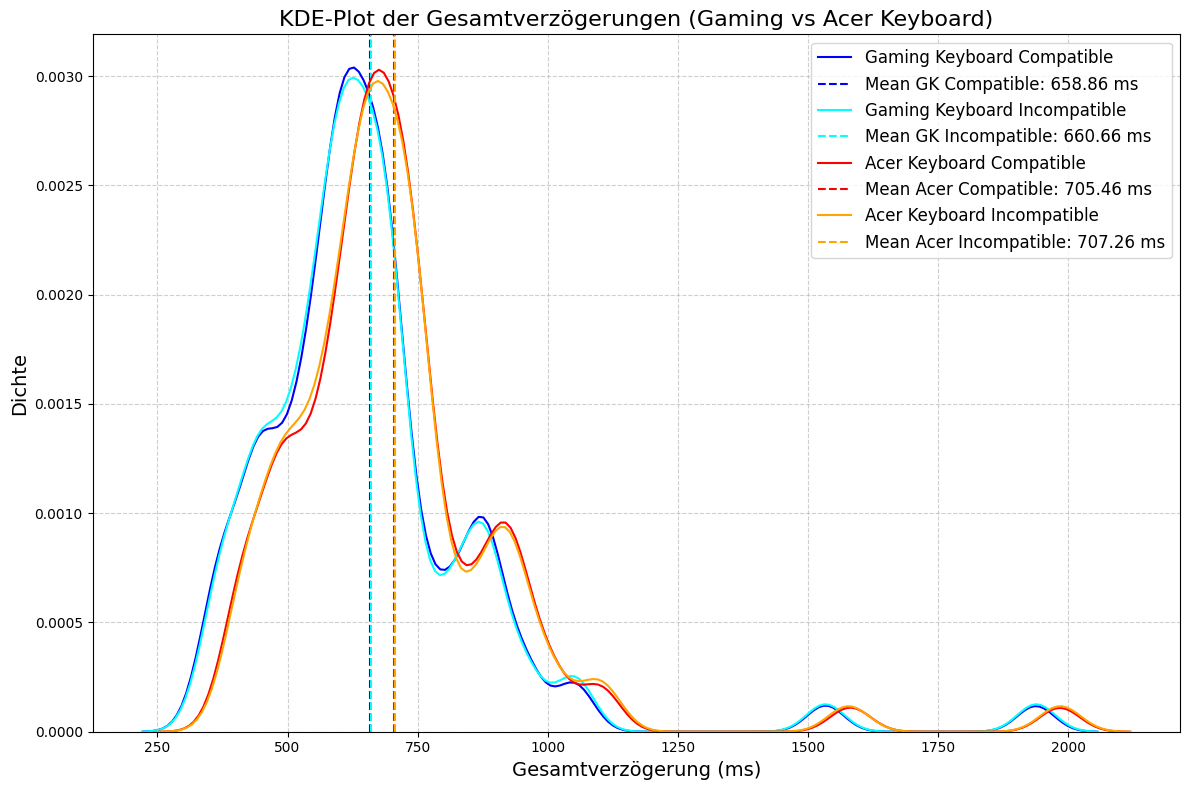

In [37]:
# KDE-Plot erstellen
plt.figure(figsize=(12, 8))

# KDE für Gaming Keyboard (compatible)
sns.kdeplot(gesamtverzögerung_compatible_gk, label="Gaming Keyboard Compatible", color='blue')
plt.axvline(np.mean(gesamtverzögerung_compatible_gk), color='blue', linestyle='--', label=f"Mean GK Compatible: {gk_compatible_mean_final:.2f} ms")

# KDE für Gaming Keyboard (incompatible)
sns.kdeplot(gesamtverzögerung_incompatible_gk, label="Gaming Keyboard Incompatible", color='cyan')
plt.axvline(np.mean(gesamtverzögerung_incompatible_gk), color='cyan', linestyle='--', label=f"Mean GK Incompatible: {gk_incompatible_mean_final:.2f} ms")

# KDE für Acer Keyboard (compatible)
sns.kdeplot(gesamtverzögerung_compatible_acer, label="Acer Keyboard Compatible", color='red')
plt.axvline(np.mean(gesamtverzögerung_compatible_acer), color='red', linestyle='--', label=f"Mean Acer Compatible: {acer_compatible_mean_final:.2f} ms")

# KDE für Acer Keyboard (incompatible)
sns.kdeplot(gesamtverzögerung_incompatible_acer, label="Acer Keyboard Incompatible", color='orange')
plt.axvline(np.mean(gesamtverzögerung_incompatible_acer), color='orange', linestyle='--', label=f"Mean Acer Incompatible: {acer_incompatible_mean_final:.2f} ms")

# Achsentitel und Legende
plt.title("KDE-Plot der Gesamtverzögerungen (Gaming vs Acer Keyboard)", fontsize=16)
plt.xlabel("Gesamtverzögerung (ms)", fontsize=14)
plt.ylabel("Dichte", fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Plot anzeigen
plt.tight_layout()
plt.show()
